In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml

In [2]:
#load the credit dataset from OpenML
data = fetch_openml(name="credit-g",version=1, as_frame= True)

In [3]:
#Convert to DataFrame
df=data.frame
#Preview
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


In [4]:
#Check dataset shape and column info
print(f"Dataset shape : {df.shape}")
df.info()

Dataset shape : (1000, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   checking_status         1000 non-null   category
 1   duration                1000 non-null   int64   
 2   credit_history          1000 non-null   category
 3   purpose                 1000 non-null   category
 4   credit_amount           1000 non-null   int64   
 5   savings_status          1000 non-null   category
 6   employment              1000 non-null   category
 7   installment_commitment  1000 non-null   int64   
 8   personal_status         1000 non-null   category
 9   other_parties           1000 non-null   category
 10  residence_since         1000 non-null   int64   
 11  property_magnitude      1000 non-null   category
 12  age                     1000 non-null   int64   
 13  other_payment_plans     1000 non-null   category
 14

In [5]:
#Check for missing values
df.isnull().sum().sort_values(ascending=False)

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

In [6]:
for col in df.columns:
    uniques = df[col].unique()
    if "?" in uniques or "Unknown" in uniques:
        print(f"Missing flag detected in : {col}")
else:
    print("all ok")

all ok


In [7]:
#Target variable is "class"
df['class'].value_counts(normalize=True)

class
good    0.7
bad     0.3
Name: proportion, dtype: float64

In [8]:
df.dtypes.value_counts()

int64       7
category    1
category    1
category    1
category    1
category    1
category    1
category    1
category    1
category    1
category    1
category    1
category    1
category    1
category    1
Name: count, dtype: int64

In [9]:
df.select_dtypes(include='category').shape[1]

14

In [10]:
cat_cols = df.select_dtypes(include='category').columns.tolist()
print(f"Categorical Columns ({len(cat_cols)}): \n {cat_cols}")

Categorical Columns (14): 
 ['checking_status', 'credit_history', 'purpose', 'savings_status', 'employment', 'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 'job', 'own_telephone', 'foreign_worker', 'class']


In [11]:
df['housing'].dtype

CategoricalDtype(categories=['for free', 'own', 'rent'], ordered=False, categories_dtype=object)

In [12]:
#drop target temporarily
x = df.drop('class', axis=1)

In [13]:
#one-hot encode all categorical features
x_encoded = pd.get_dummies(x, drop_first=True)
x_encoded.head()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,checking_status_<0,checking_status_>=200,checking_status_no checking,...,property_magnitude_car,other_payment_plans_none,other_payment_plans_stores,housing_own,housing_rent,job_unemp/unskilled non res,job_unskilled resident,job_skilled,own_telephone_yes,foreign_worker_yes
0,6,1169,4,4,67,2,1,True,False,False,...,False,True,False,True,False,False,False,True,True,True
1,48,5951,2,2,22,1,1,False,False,False,...,False,True,False,True,False,False,False,True,False,True
2,12,2096,2,3,49,1,2,False,False,True,...,False,True,False,True,False,False,True,False,False,True
3,42,7882,2,4,45,1,2,True,False,False,...,False,True,False,False,False,False,False,True,False,True
4,24,4870,3,4,53,2,2,True,False,False,...,False,True,False,False,False,False,False,True,False,True


In [14]:
#add target back (map good/bad to binary)
y = df['class'].map({'good': 1, "bad": 0})
y.head()

0    1
1    0
2    1
3    1
4    0
Name: class, dtype: category
Categories (2, int64): [0, 1]

In [15]:
#confirm shapes
print(f"x_encoded shape: {x_encoded.shape}")
print(f"target value counts :\n{y.value_counts(normalize=True)}")

x_encoded shape: (1000, 48)
target value counts :
class
1    0.7
0    0.3
Name: proportion, dtype: float64


In [16]:
from sklearn.model_selection import train_test_split
#stratified train-test split
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.2, stratify=y, random_state=42)

#confirm class balance in splits
print("train target class balance:")
print(y_train.value_counts(normalize=True))

print("\ntest target class balance:")
print(y_test.value_counts(normalize=True))

train target class balance:
class
1    0.7
0    0.3
Name: proportion, dtype: float64

test target class balance:
class
1    0.7
0    0.3
Name: proportion, dtype: float64


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,f1_score, roc_auc_score, roc_curve)
import matplotlib.pyplot as plt

In [18]:
'''results={}
solvers=['liblinear','lbfgs','sag','saga','newton-cg']
for s in solvers:
    try:
        model = LogisticRegression(solver=s, max_iter=1000)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        y_prob = model.predict_proba(x_test)[:,1]
        
        results[s]={ 'accuracy': accuracy_score(y_test, y_pred),'f1':f1_score(y_test, y_pred), 'roc_auc': roc_auc_score(y_test, y_prob)}
        
    except Exception as e:
        print(f"{s} failed:{e}")

df_results= pd.DataFrame(results).T

df_results.plot(kind='bar', figsize=(10,5), colormap='Set2')
plt.title('l2 solver comparison - logistic regression')
plt.ylabel('score')
plt.xticks(rotation=0)
plt.grid(True, axis='y')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show'''

'results={}\nsolvers=[\'liblinear\',\'lbfgs\',\'sag\',\'saga\',\'newton-cg\']\nfor s in solvers:\n    try:\n        model = LogisticRegression(solver=s, max_iter=1000)\n        model.fit(x_train, y_train)\n        y_pred = model.predict(x_test)\n        y_prob = model.predict_proba(x_test)[:,1]\n        \n        results[s]={ \'accuracy\': accuracy_score(y_test, y_pred),\'f1\':f1_score(y_test, y_pred), \'roc_auc\': roc_auc_score(y_test, y_prob)}\n        \n    except Exception as e:\n        print(f"{s} failed:{e}")\n\ndf_results= pd.DataFrame(results).T\n\ndf_results.plot(kind=\'bar\', figsize=(10,5), colormap=\'Set2\')\nplt.title(\'l2 solver comparison - logistic regression\')\nplt.ylabel(\'score\')\nplt.xticks(rotation=0)\nplt.grid(True, axis=\'y\')\nplt.legend(loc=\'lower right\')\nplt.tight_layout()\nplt.show'

In [19]:
""""results_1={}
solvers=['liblinear','lbfgs','sag','saga','newton-cg']
for s in solvers:
    try:
        model = LogisticRegression(penalty='l1',solver=s, max_iter=1000)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        y_prob = model.predict_proba(x_test)[:,1]
        
        results_1[s]={ 'accuracy': accuracy_score(y_test, y_pred),'f1':f1_score(y_test, y_pred), 'roc_auc': roc_auc_score(y_test, y_prob)}
        
    except Exception as e:
        print(f"{s} failed:{e}")

df_results_1= pd.DataFrame(results_1).T

df_results_1.plot(kind='bar', figsize=(10,5), colormap='Set2')
plt.title('l1 solver comparison - logistic regression')
plt.ylabel('score')
plt.xticks(rotation=0)
plt.grid(True, axis='y')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show"""

'"results_1={}\nsolvers=[\'liblinear\',\'lbfgs\',\'sag\',\'saga\',\'newton-cg\']\nfor s in solvers:\n    try:\n        model = LogisticRegression(penalty=\'l1\',solver=s, max_iter=1000)\n        model.fit(x_train, y_train)\n        y_pred = model.predict(x_test)\n        y_prob = model.predict_proba(x_test)[:,1]\n        \n        results_1[s]={ \'accuracy\': accuracy_score(y_test, y_pred),\'f1\':f1_score(y_test, y_pred), \'roc_auc\': roc_auc_score(y_test, y_prob)}\n        \n    except Exception as e:\n        print(f"{s} failed:{e}")\n\ndf_results_1= pd.DataFrame(results_1).T\n\ndf_results_1.plot(kind=\'bar\', figsize=(10,5), colormap=\'Set2\')\nplt.title(\'l1 solver comparison - logistic regression\')\nplt.ylabel(\'score\')\nplt.xticks(rotation=0)\nplt.grid(True, axis=\'y\')\nplt.legend(loc=\'lower right\')\nplt.tight_layout()\nplt.show'

In [20]:
#initialize model
logreg = LogisticRegression(penalty='l1',solver= 'liblinear',max_iter=2000)

In [21]:
#train
logreg.fit(x_train, y_train)

,penalty,'l1'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,2000
,multi_class,'deprecated'


In [22]:
coef=logreg.coef_[0]
num_zero = np.sum(coef == 0)
print(f"l1 penalty set {num_zero} features to zero out of {len(coef)}")

l1 penalty set 8 features to zero out of 48


In [23]:
#predict
y_pred_l1 = logreg.predict(x_test)
y_prob_l1 = logreg.predict_proba(x_test)[:, 1]

In [24]:
#confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_l1))

#classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_l1))

#ROC AUC Score
roc_score_l1 = roc_auc_score(y_test, y_prob_l1)
print(f"ROC AUC Score:{roc_score_l1: .4f}")

Confusion Matrix:
[[ 28  32]
 [ 28 112]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.47      0.48        60
           1       0.78      0.80      0.79       140

    accuracy                           0.70       200
   macro avg       0.64      0.63      0.64       200
weighted avg       0.69      0.70      0.70       200

ROC AUC Score: 0.7585


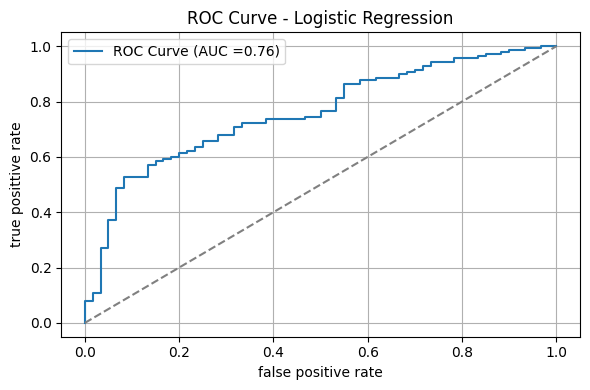

In [25]:
#ROC Curve
fpr,tpr,thresholds = roc_curve(y_test, y_prob_l1)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label = f"ROC Curve (AUC ={roc_score_l1:.2f})")
plt.plot([0,1],[0,1],linestyle='--', color='gray')
plt.xlabel('false positive rate')
plt.ylabel('true posittive rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

In [27]:
#initialize the model
rf_model = RandomForestClassifier(n_estimators=140, max_depth=None, random_state=42, class_weight="balanced")

In [28]:
#train the model
rf_model.fit(x_train, y_train)

,n_estimators,140
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [29]:
y_pred_rf = rf_model.predict(x_test)
y_proba_rf = rf_model.predict_proba(x_test)[:,1] #needed for AUC

In [30]:
#evaluate
print("confusion matrix : \n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report :\n", classification_report(y_test, y_pred_rf))
print("\nROC AUC Score : ", roc_auc_score(y_test, y_proba_rf))

confusion matrix : 
 [[ 23  37]
 [ 16 124]]

Classification Report :
               precision    recall  f1-score   support

           0       0.59      0.38      0.46        60
           1       0.77      0.89      0.82       140

    accuracy                           0.73       200
   macro avg       0.68      0.63      0.64       200
weighted avg       0.72      0.73      0.72       200


ROC AUC Score :  0.7820238095238095


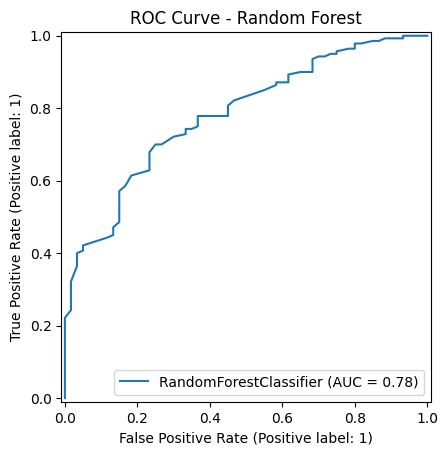

In [31]:
# ROC Curve Plot
RocCurveDisplay.from_estimator(rf_model, x_test, y_test)
plt.title("ROC Curve - Random Forest")
plt.show()

In [32]:
'''scores=[]
for n in range(10,201,10):
    rf_tr=RandomForestClassifier(n_estimators=n, class_weight='balanced',random_state=42)
    rf_tr.fit(x_train, y_train)
    y_proba1= rf_tr.predict_proba(x_test)[:,1]
    auc = roc_auc_score(y_test, y_proba1)
    scores.append((n,auc))
    
x, y =zip(*scores)
plt.plot(x,y)
plt.xlabel("n_estimators")
plt.ylabel("ROC AUC")
plt.title("AUC vs Number of Trees")
plt.grid()
plt.show()'''
                                

'scores=[]\nfor n in range(10,201,10):\n    rf_tr=RandomForestClassifier(n_estimators=n, class_weight=\'balanced\',random_state=42)\n    rf_tr.fit(x_train, y_train)\n    y_proba1= rf_tr.predict_proba(x_test)[:,1]\n    auc = roc_auc_score(y_test, y_proba1)\n    scores.append((n,auc))\n    \nx, y =zip(*scores)\nplt.plot(x,y)\nplt.xlabel("n_estimators")\nplt.ylabel("ROC AUC")\nplt.title("AUC vs Number of Trees")\nplt.grid()\nplt.show()'

In [33]:
import seaborn as sns


In [34]:
#get feature importances from the trained model
importances= rf_model.feature_importances_

In [35]:
#match them to the column names
feature_names=x_encoded.columns
feat_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})


In [36]:
#sort by importance
feat_importance_df= feat_importance_df.sort_values(by='importance',ascending=False).head(15)

C:\Users\VISHNUMAYA R NAIR\AppData\Local\Temp\ipykernel_21700\707101969.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feat_importance_df, palette=colors)


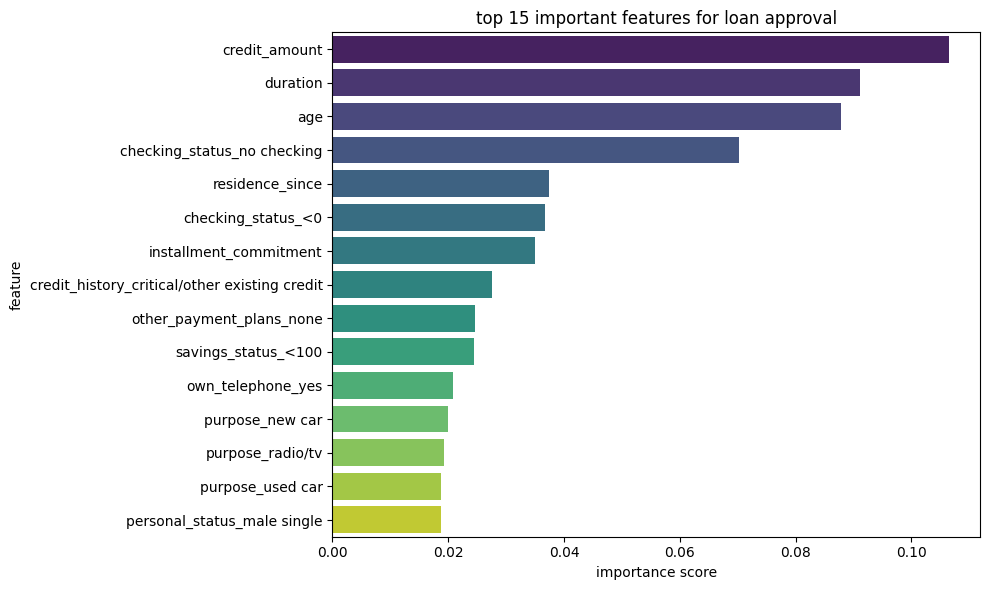

In [37]:
#plot the top 15
colors=sns.color_palette('viridis',len(feat_importance_df))
plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=feat_importance_df, palette=colors)
plt.title('top 15 important features for loan approval')
plt.xlabel('importance score')
plt.ylabel('feature')
plt.tight_layout()
plt.show()

In [38]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [39]:
comparison_df = pd.DataFrame({'metrics': ['ROC AUC', 'accuracy', 'precision', 'recall', 'fi score'], 'Logistic regression (l1)':
                             [roc_auc_score(y_test, y_prob_l1),logreg.score(x_test, y_test), precision_score(y_test, y_pred_l1),
                              recall_score(y_test, y_pred_l1), f1_score(y_test,y_pred_l1)],
                              'Random forest':[roc_auc_score(y_test, y_proba_rf), rf_model.score(x_test,y_test),precision_score(y_test, y_pred_rf),
                              recall_score(y_test, y_pred_rf), f1_score(y_test, y_pred_rf)]})

# round for clean display
print(comparison_df.round(4))
                                                                                                             

     metrics  Logistic regression (l1)  Random forest
0    ROC AUC                    0.7585         0.7820
1   accuracy                    0.7000         0.7350
2  precision                    0.7778         0.7702
3     recall                    0.8000         0.8857
4   fi score                    0.7887         0.8239


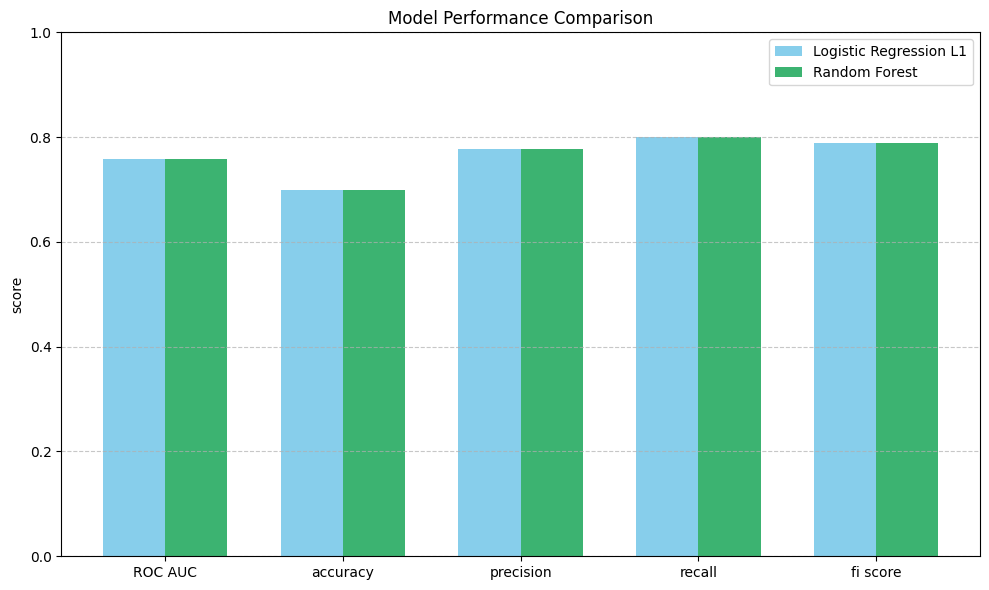

In [40]:
# graphical representation
metrics = ['ROC AUC', 'accuracy', 'precision', 'recall', 'fi score']
lr_scores = [roc_auc_score(y_test, y_prob_l1),logreg.score(x_test, y_test), precision_score(y_test, y_pred_l1),
            recall_score(y_test, y_pred_l1), f1_score(y_test,y_pred_l1)]
rf_scores = [roc_auc_score(y_test, y_proba_rf), rf_model.score(x_test,y_test),precision_score(y_test, y_pred_rf),
            recall_score(y_test, y_pred_rf), f1_score(y_test, y_pred_rf)]

a = np.arange(len(metrics)) # label locations
width = 0.35 # width of the bars

plt.figure(figsize=(10,6))
plt.bar(a-width/2,lr_scores, width, label='Logistic Regression L1', color ='skyblue')
plt.bar(a+width/2,lr_scores, width, label='Random Forest', color ='mediumseagreen')

plt.ylabel('score')
plt.title('Model Performance Comparison')
plt.xticks(ticks=a, labels=metrics)
plt.ylim(0,1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [41]:
import joblib
#save both trained models

joblib.dump(logreg,"logistic_model_l1.pkl")
joblib.dump(rf_model, "random_forest_model.pkl")

#save the feature list
joblib.dump(x_encoded.columns.tolist(), "feature_columns.pkl")



['feature_columns.pkl']

In [42]:
import gradio as gr
import pickle

In [43]:
#load models and column names
lr_model = joblib.load("logistic_model_l1.pkl")
rf_model = joblib.load("random_forest_model.pkl")
feature_columns = joblib.load("feature_columns.pkl")

In [44]:
#define prediction function
def predict_loan_approval(model_choice, *user_inputs):
    #define raw column names (same order as gradio inputs)
    raw_feature_names = ['duration', 'credit_amount','checking_status','credit_history', 'purpose','savings_status',
                         'employment','installment_commitment','personal_status', 'other_parties','residence_since',
                         'property_magnitude','age','other_payment_plans','housing','exising_credits','job', 'own_telephone',
                         'num_dependents', 'foreign_worker']
    
    #convert inputs to DataFrame with correct column names
    user_df=pd.DataFrame([user_inputs], columns= raw_feature_names)
    
    #one-hot encode the inputs
    user_encoded = pd.get_dummies(user_df)
    
    # align with training columns
    #load feature columns used during training
    with open('feature_columns.pkl', 'rb') as f:
        feature_columns = pickle.load(f)
    
    #add missing columns as 0
    for col in feature_columns:
        if col not in user_encoded.columns:
            user_encoded[col]=0
    
    #ensure correct column order
    user_encoded = user_encoded[feature_columns]
    
    #select model
    model=lr_model if model_choice == "Logistic Regression (L1)" else rf_model
    
    #predict
    prediction = model.predict(user_encoded)[0]
    proba = model.predict_proba(user_encoded)[0][1] #probablity of class=1
    
    result = "OK Approved" if prediction==1 else "Sorry Not Approved"
    return f"{result}(Confidence: {proba:.2f})" 

In [45]:
#dynamically create Gradio input widgets
'''inputs=[]

for col in feature_columns:
    if 'duration' in col or 'amount' in col or 'age' in col:
        inputs.append(gr.Number(label=col))
    else:
        inputs.append(gr.Textbox(label=col))'''
    
#add model dropdown at the top
model_dropdown = gr.Dropdown( choices=['Logistic Regression (L1)', 'Random Forest'],value = 'Random Forest', label = "Select Model")

In [46]:
#inputs - updated for user clarity

inputs = [gr.Number(label='Duration in Months', minimum= 0, maximum =72, value=12),
         gr.Number(label='Credit Amount', minimum=0,value=1000),
          
         gr.Dropdown(choices=['no checking','<0', '0<X<200', '>=200'], label = 'Checking Account Status'),
         gr.Dropdown(choices=['no credit/all paid', 'all paid', 'existing paid', 'delayed previously', 'critical/others'], label = 'Credit History'),
         gr.Dropdown(choices=['radio/tv', 'furniture/equipment', 'new car', 'used car', 'business', 'domestic appliance', 'repairs', 'vacation', 'education'], label = 'Loan Purpose'),
         gr.Dropdown(choices=['no known savings','<100', '500<=X<1000', '>=1000', '100<=X<500'], label = 'Savings Status'),
         gr.Dropdown(choices=['unemployed', '<1', '1<=X<4','4<=X<7', '>=7'], label = 'Employment Duration'),
          
         gr.Number(label='Installment % of Income', minimum=1,maximum=4),
         gr.Dropdown(choices=['male single', 'female div/dep/mar','male div/sep', 'male mar/wid'], label = 'Personal Status'),
         gr.Dropdown(choices=['none', 'guarantor', 'co applicant'], label = 'Other Parties'),
         gr.Number(label='Residence Duration (Years)', minimum=0, value=1),
         gr.Dropdown(choices=['real estate', 'life insurance', 'car', 'no known property'], label = 'Property Type'),
          
         gr.Number(label='Age', minimum=18, maximum=80),
         gr.Dropdown(choices=['none', 'bank', 'stores'], label = 'Other Payment Plans'),
         gr.Dropdown(choices=['own', 'for free', 'rent'], label = 'Housing Type'),
         gr.Number(label='Existing Credits at Bank',minimum=0,maximum=5),
         gr.Dropdown(choices=['skilled', 'unskilled resident', 'high qualif/self emp/mgmt', 'unemp/unskilled non res'], label = 'Job'),
         gr.Dropdown(choices=['yes', 'none'], label = 'Own Telephone ?'),
         gr.Number(label='Number of Liable People',minimum=0,maximum=6),
         gr.Dropdown(choices=['yes', 'no'], label = 'Foreign Worker?')]

In [47]:
#LAUNCH THE APP
demo = gr.Interface(fn=predict_loan_approval, inputs=[model_dropdown]+inputs, outputs='text',title='Loan Approval Predictor',
                   description = 'Enter applicant details and choose a model to predict loan approval.')

demo.launch(share=True)

* Running on local URL:  http://127.0.0.1:7860

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.


In [49]:
if __name__ == "__main__":
    demo.launch(share=True)

Rerunning server... use `close()` to stop if you need to change `launch()` parameters.
----

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.
